In [1]:
# Sample API
import mae6225
import simulation
mae6225.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['asol', 'ivar', 'rvar', 'eror']

# Define boundary condition for the poisson test
user_bc = 'neumann'

# Define boundary conditions for variable ivar
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
bc_val  = {'ivar': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
grid = mae6225.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type, user_bc_val=bc_val)

In [3]:
# Compute the analytical solution 
simulation.get_analytical(grid, 'asol', user_bc)

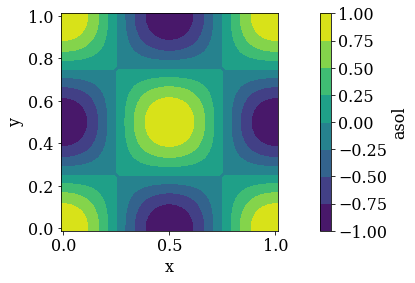

In [4]:

# Plot the analytical solution
mae6225.io.plot_contour(grid, 'asol')

In [5]:
# Calculate the right-hand side of the Poisson system
simulation.get_rhs(grid, 'rvar', user_bc)

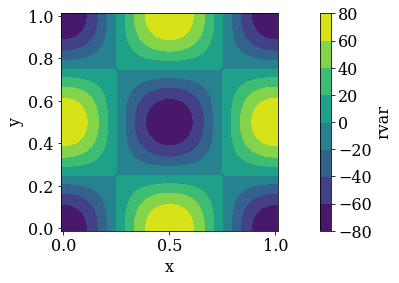

In [6]:
# Plot the right-hand side of the Poisson system
mae6225.io.plot_contour(grid, 'rvar')

In [7]:
# Solve the Poisson system
ites, res = mae6225.poisson.solve_jacobi(grid, 'ivar', 'rvar',
                                         maxiter=10000, tol=1e-9, verbose=True)

Jacobi method:
- Number of iterations: 1267
- Final residual: 9.976258787425213e-10


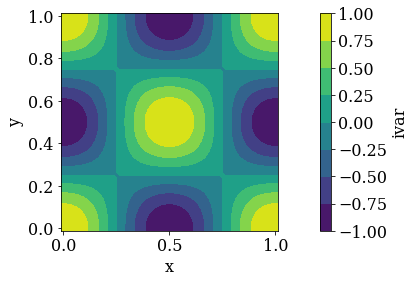

In [8]:
# Plot the numerical solution
mae6225.io.plot_contour(grid, 'ivar')

In [9]:
# Compute the error (absolute value of the difference)
grid.get_error('eror', 'ivar', 'asol')

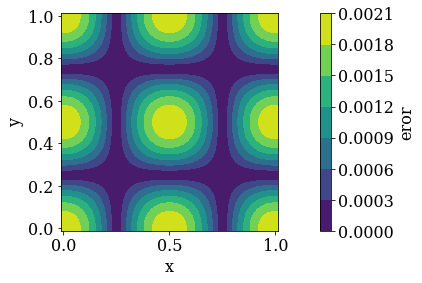

In [10]:
# Plot the error
mae6225.io.plot_contour(grid, 'eror')

In [11]:
# Compute the L2-norm of the error.
l2_norm = grid.get_l2_norm('eror')

In [12]:
l2_norm

2.5659207098760422e-05